In [44]:
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import pickle
import numpy as np

In [48]:
test_file = 'B90D2022-10-18-18-19-34'
bpm_str = test_file.split("D")[0]
bpm_str = bpm_str.replace("B", "")
bpm = (int) (bpm_str)
print(bpm)
audio_path = f'../../res/recorded_audios/{test_file}.wav'

90


In [46]:
def get_real_bpm_array(number_beats , bpm):
    res = []
    for i in range(number_beats):
        res.append(60.0 * i/ (bpm ) )
    return res

19


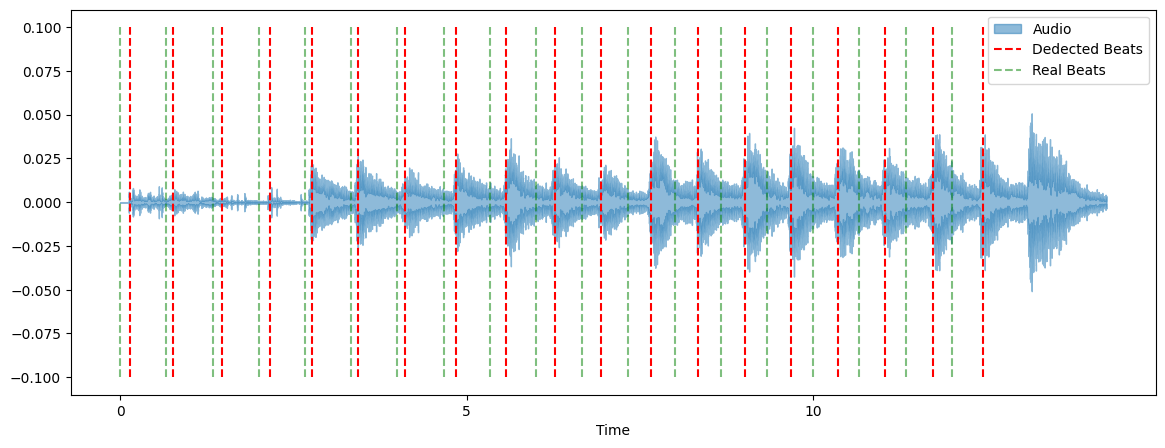

In [47]:
#normal audio:
fig, ax = plt.subplots(nrows = 1, sharex=True, figsize=(14, 5))
y, sr = librosa.load(audio_path)
librosa.display.waveshow(y, sr=sr, alpha=0.5,  label='Audio')

# get beats and onset
# https://librosa.org/doc/main/generated/librosa.beat.beat_track.html#librosa.beat.beat_track
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

# some magic, i dont understand ;)
onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median)
hop_length = 512

times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)

#print(beats)
#ax.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
print(len(beats))
ax.vlines(times[beats], -0.1, 0.1, alpha=1, color='r',

           linestyle='--', label='Dedected Beats')
     
ax.vlines(get_real_bpm_array(len(beats), bpm), -0.1, 0.1, alpha=0.5, color='g',

           linestyle='--', label='Real Beats')

ax.legend()
